# Importo Librerias

In [1]:
import math
import numpy as np
import scipy as sy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from numpy import *
#%matplotlib qt5
from PIL import Image
import cv2
#%matplotlib qt5


# Cargo Imagenes 

In [2]:
m =  cv2.imread("HazAdel3.tif")
h,w,bpp = np.shape(m)
w1=np.arange(w)
h1=np.arange(h)


m2 =  cv2.imread("HazAtras3.tif")
h2,w2,bpp2 = np.shape(m2)
w2=np.arange(w2)
h2=np.arange(h2)


m3 =  cv2.imread("CajaAdel2.tif")
h3,w3,bpp3 = np.shape(m3)
w3=np.arange(w3)
h3=np.arange(h3)


In [3]:
t = Image.open('HazAdel3.tif')
t2=Image.open('HazAtras3.tif')
t3=Image.open('CajaAdel2.tif')

In [4]:
# LAS IMAGENES SON RGB por lo que con el indice i decido que color voy a analizar:
i=2 # elijo  azul

In [5]:
# un 1mm son 4 pixeles
# paso de pixel a mm
w1=w1/4
h1=h1/4

w2=w2/4
h2=h2/4

w3=w3/4
h3=h3/4

# Visualización de imagenes sin analizar

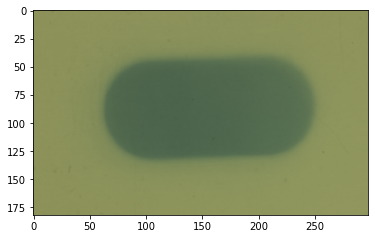

In [6]:
plt.imshow(t)

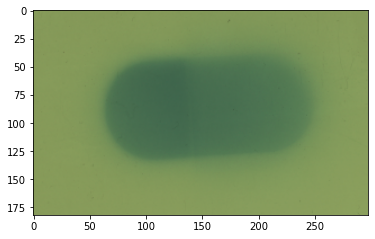

In [7]:
plt.imshow(t2)

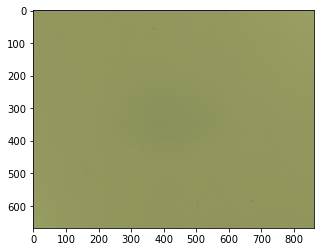

In [8]:
plt.imshow(t3)

# Analisis de Imagenes

## para graficar sin fondo, escaleado relativo con escala 0 1

In [9]:
m_sf=(-m[:,:,i]+(m[1,1,i]-256))/256*100
m2_sf=(-m2[:,:,i]+(m2[1,1,i]-256))/256*100
m3_sf=(-m3[:,:,i]+(m3[1,1,i]-256))/256*100 # hay que ver que hacer con este

No handles with labels found to put in legend.


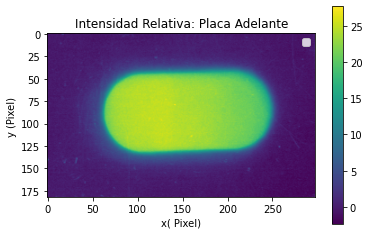

In [10]:
plt.imshow(m_sf,cmap = 'viridis')
xlabel('x( Pixel)')
ylabel('y (Pixel) ')
title('Intensidad Relativa: Placa Adelante')
plt.legend()
plt.colorbar()
#plt.savefig('Placa_Adelante.png', dpi=1000)

No handles with labels found to put in legend.


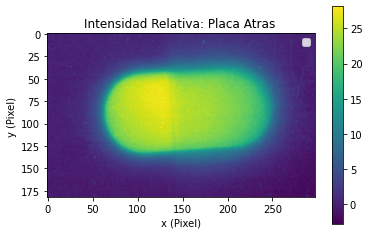

In [11]:
plt.imshow(m2_sf,cmap = 'viridis')
xlabel('x (Pixel)')
ylabel('y (Pixel) ')
title('Intensidad Relativa: Placa Atras ')
plt.legend()
plt.colorbar()
#plt.savefig('Placa_Atras.png', dpi=1000)

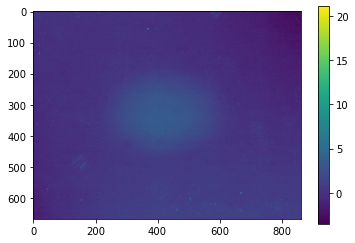

In [12]:
plt.imshow(m3_sf,cmap = 'viridis')
plt.colorbar()

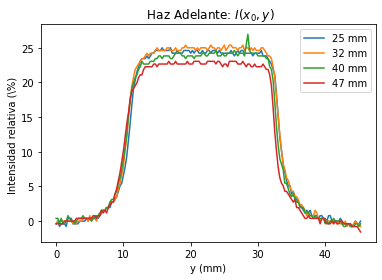

In [13]:
for j in [100,130,160,190]:
    e=int(w1[j])
    plt.plot(h1,m_sf[:,j],label="{:d} mm".format(e))
xlabel('y (mm)')
ylabel('Intensidad relativa (\%) ')    
title(' Haz Adelante: $I(x_0,y)$')
plt.legend()
#plt.savefig('I_Placa_Adelante_y.png', dpi=1000)
plt.show() 


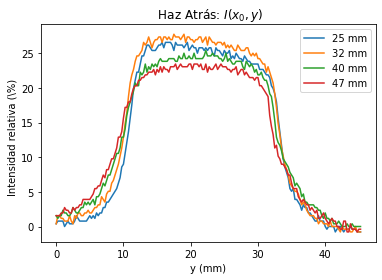

In [14]:
for j in [100,130,160,190]:
    e=int(w1[j])
    plt.plot(h1,m2_sf[:,j],label="{:d} mm".format(e))
xlabel('y (mm)')
ylabel('Intensidad relativa (\%)  ')    
title(' Haz Atrás: $I(x_0,y)$')
plt.legend()
#plt.savefig('I_Placa_Atras_y.png', dpi=1000)
plt.show()


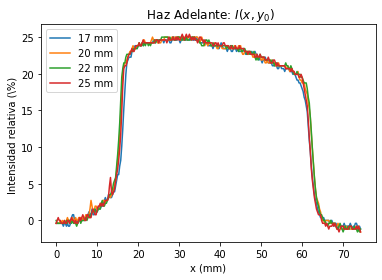

In [15]:
 for j in [70,80,90,100]:
    e=int(h1[j])
    plt.plot(w1,m_sf[j,:],label="{:d} mm".format(e))
xlabel('x (mm)')
ylabel('Intensidad relativa (\%) ')    
title(' Haz Adelante: $I(x,y_0)$')
plt.legend()
#plt.savefig('I_Placa_Adelante_x.png', dpi=1000)
plt.show() 


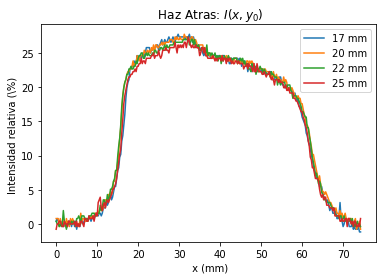

In [16]:
 for j in [70,80,90,100]:
    e=int(h2[j])
    plt.plot(w2,m2_sf[j,:],label="{:d} mm".format(e))
xlabel(' x (mm)')
ylabel('Intensidad relativa (\%) ')    
title(' Haz Atras: $I(x,y_0)$')
plt.legend()
#plt.savefig('I_Placa_Atras_x.png', dpi=1000)
plt.show() 


## Promedio 

In [17]:
# esto es una forma para promediar automatico. marco el punto central del haz como (x0,y0) y despues me corro con +/-delta para promediar  los valores centrales. 
# Se toma un delta, tal que suma los pixeles con 1mm para arriba y 1mm abajo. Esto para suavisar la curva
deltax=4/4  #mm
deltay=4/4 #mm
y0=75/4  #mm
x0=149/4 #mm
#x0=120 # para comparar donde NO estaba el Li
nx=np.mean(m[:,(w1>-deltax+x0)&(w1<deltax+x0),i],axis=1)
ny=np.mean(m[(h1>-deltay+y0)&(h1<deltay+y0),:,i],axis=0)


nx2=np.mean(m2[:,(w2>-deltax+x0)&(w2<deltax+x0),i],axis=1)
ny2=np.mean(m2[(h2>-deltay+y0)&(h2<deltay+y0),:,i],axis=0)

#shape(m2[(y2>-deltay+y02)&(y2<deltay+y02),:,1])

In [18]:
# invierto color 
nx=255-nx
ny=255-ny

nx2=255-nx2
ny2=255-ny2

In [19]:
# resto fondo

nx=nx-nx[0]
nx2=nx2-nx2[0]

ny=ny-ny[0]
ny2=ny2-ny2[0]

In [20]:
#normalizo

nx=nx/256*100
ny=ny/256*100

nx2=nx2/256*100
ny2=ny2/256*100

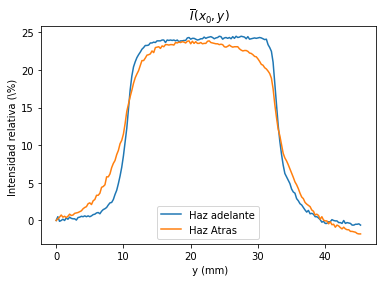

In [21]:
plt.plot(h1,nx,label="Haz adelante")
plt.plot(h2,nx2,label="Haz Atras")
xlabel(' y (mm)')
ylabel('Intensidad relativa (\%) ')    
title(' $\overline{I}(x_0,y)$')
plt.legend()
#plt.savefig('I_Placas_promedio_y.png', dpi=1000)
plt.show()


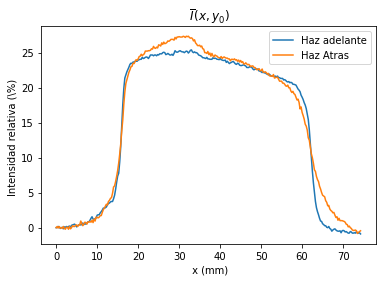

In [22]:
plt.plot(w1,ny,label="Haz adelante")
plt.plot(w2,ny2,label="Haz Atras")
xlabel(' x (mm)')
ylabel('Intensidad relativa (\%) ')    
title(' $\overline{I}(x,y_0)$')
plt.legend()
#plt.savefig('I_Placas_promedio_x.png', dpi=1000)
plt.show()


In [23]:
## Caja Adelante
x03=401/4 
y03=338/4
nx3=np.mean(m3[:,(w3>-deltax+x03)&(w3<deltax+x03),i],axis=1)
ny3=np.mean(m3[(h3>-deltay+y0)&(h3<deltay+y03),:,i],axis=0)

# invierto color 
nx3=255-nx3
ny3=255-ny3
# resto fondo
nx3=nx3-nx3[0]
ny3=ny3-ny3[0]


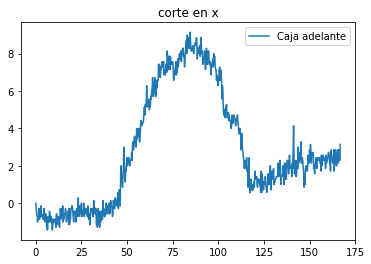

In [24]:
plt.plot(h3,nx3,label="Caja adelante")
title('corte en x')
plt.legend()
plt.show()

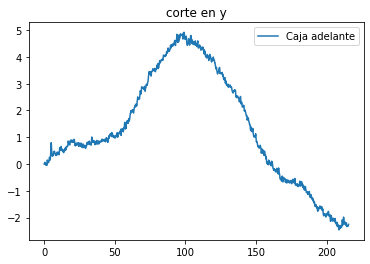

In [25]:
plt.plot(w3,ny3,label="Caja adelante")

title('corte en y')
plt.legend()
plt.show()

### No es posible distingir la contribución del haz respecto del fondo ambiente por lo que el resoltado obtenido no es valido